In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

1. Para simular un conjunto de características $x_1$ , $x_2$,..., $x_n$ trabajaremos en la primera parte con dos características de datos aleatorios que presentan un plano y mostraremos que los párametros optimizados se corresponden con el valor esperado.

- Definir la ecuación  $y = 2.1*x_1 - 3.1*x_2$, y generar números aleatorios que pertenecen al plano.

- Realizar un diagrama 3D de los puntos generados aleatoriamente.


In [ ]:
#Plano:
N = 100
x1 = np.liNspace(-1, 1, N)
x2 = np.linspace(-1, 1, N)
X_1, X_2 = np.meshgrid(x1, x2)
Y = 2.1 * X_1 - 3.1 * X_2

#Puntos aleatorios en el plano:
x1_random = np.random.uniform(-1, 1, N)
x2_random = np.random.uniform(-1, 1, N)
y = 2.1 * x1_random - 3.1 * x2_random


#Grafica
fig = go.Figure(go.Surface(x=X_1, y=X_2, z=Y))
fig.add_trace(go.Scatter3d(x=x1_random, y=x2_random, z=y, mode='markers'))
fig.show()

2. Inicializar conjunto de parámetros $\Theta$ de manera aleatoria.

In [ ]:
dim = 3
theta = np.random.uniform(low = -10, high = 10, size=(dim))
theta = np.column_stack((theta))
theta.shape

(1, 3)

3. Construir la matrix X con dimensiones $(n+1, m)$, m es el numero de datos de entrenamiento y (n) el número de caracteristicas.

In [ ]:
X = np.vstack((np.ones(N),x1_random,x2_random))
X.shape

(3, 100)

4. Calcular la función de coste(revise cuidosamente las dimensiones de cada matriz):

  - $h = \Theta^{T} X $
  - $\Lambda= (h -Y) $
  - $\Lambda*= (h -Y)^2 $
  - $\Lambda= [\Lambda_1,\Lambda_2, ...,\Lambda_m]$
  - $J = \frac{1}{2m} \sum_{i}^m \Lambda_i $


In [ ]:
h = np.dot(theta,X)
h.shape

(1, 100)

In [ ]:
Lambda = h-y
Lambda = Lambda**2
J = np.sum(Lambda)/(2*N)
J

np.float64(63.91938439689131)

5. Aplicar el gradiente descendente:
  - Encontrar el gradiente.
  $\nabla J = \Lambda X.T$
  
  - Actualizar los nuevos parametros:
  $\Theta_{n+1}=\Theta_{n}-\alpha\nabla J$

In [ ]:
def gradiente_descendente(X, Y, theta_inicial, alpha, iteraciones, tol=1e-6):

    theta = theta_inicial
    m = len(Y)
    historial = []

    for i in range(iteraciones):

        h = np.dot(theta,X)
        Lambda = h - Y
        gradiente = (1/m) * np.dot(Lambda,X.T).T
        theta = theta - alpha * gradiente
        J = (1/(2*m)) * np.sum(Lambda**2)
        historial.append(J)

        if i > 0 and abs(historial[-2] - J) < tol:
            print(f"Convergencia alcanzada en iteración {i}")
            break

    return theta, historial

6. Iterar para encontrar los valores $\Theta$ que se ajustan el plano.



Parámetros óptimos encontrados:
θ₀ (intercepto): -0.0044 (Real: 0)
θ₁ (x1): 1.9951 (Real: 2.1)
θ₂ (x2): -3.0368 (Real: -3.1)


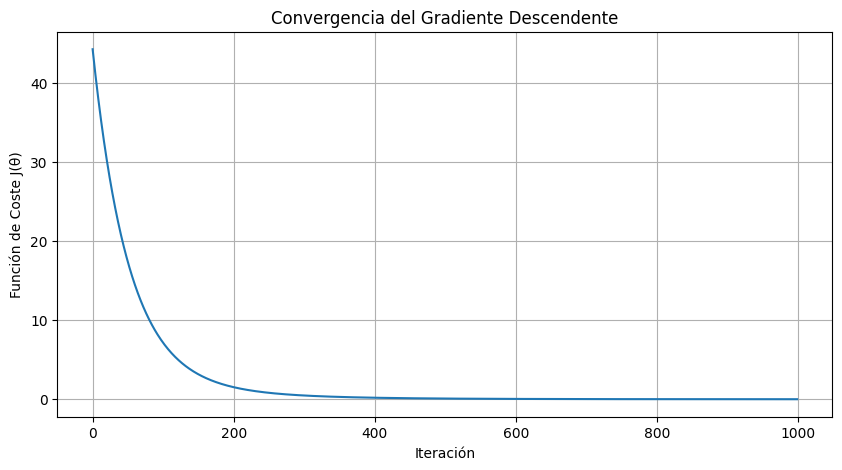

In [ ]:
alpha = 0.01
iteraciones = 1000
theta_inicial = np.random.uniform(low = -10, high = 10, size=(dim))

theta_optimo, costes = gradiente_descendente(X, y, theta_inicial, alpha, iteraciones)

# Resultados
print("\nParámetros óptimos encontrados:")
print(f"θ₀ (intercepto): {theta_optimo[0]:.4f} (Real: 0)")
print(f"θ₁ (x1): {theta_optimo[1]:.4f} (Real: 2.1)")
print(f"θ₂ (x2): {theta_optimo[2]:.4f} (Real: -3.1)")

# Visualización de la convergencia
plt.figure(figsize=(10, 5))
plt.plot(costes)
plt.xlabel('Iteración')
plt.ylabel('Función de Coste J(θ)')
plt.title('Convergencia del Gradiente Descendente')
plt.grid(True)
plt.show()